# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [119]:
df=pd.read_csv("Hotel Booking.csv")

In [120]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


# Data Cleaning

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  int32  

In [19]:
# Calculate the mean of the "children" column, ignoring NaN values
mean_children = df["children"].mean()

# Fill NaN values with the calculated mean
df["children"] = df["children"].fillna(mean_children)

# Convert the column to integer
df["children"] = df["children"].astype(int)

In [22]:
# Convert the "reservation_status_date" column to datetime, specifying dayfirst=True
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], dayfirst=True)


In [24]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [26]:
for i in df.describe(include="object").columns:
    print(i)
    print(df[i].unique())
    print("-"*30)

hotel
['Resort Hotel' 'City Hotel']
------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' '

# Removing Null values

In [ ]:
df.drop(columns=["agent" , "company"],axis= , inplace=True)

In [29]:
df.dropna(inplace=True)

In [31]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [33]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902
mean,0.371373,104.308027,2016.157617,27.166726,15.800567,0.928891,2.502136,1.858404,0.104203,0.007948,0.032010,0.087139,0.131629,0.221174,2.330676,102.000808,0.061883,0.571706,2016-07-30 07:20:24.584952064
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483174,106.903127,0.707479,13.589774,8.780371,0.996211,1.900165,0.578576,0.399166,0.097379,0.176026,0.845855,1.484647,0.652775,17.630161,50.487004,0.244168,0.792678,NaN


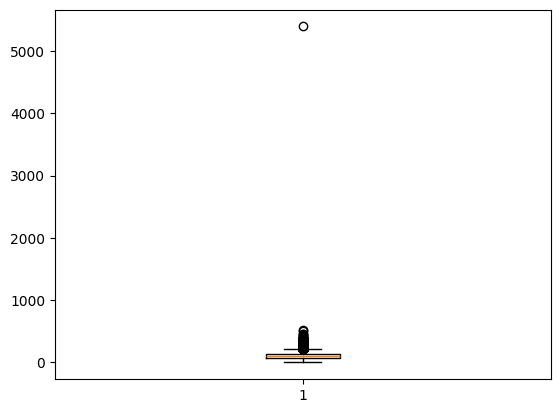

In [40]:
plt.boxplot(df["adr"])
plt.show()


In [42]:
df=df[df["adr"]<5000]

In [44]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901
mean,0.371368,104.308610,2016.157619,27.166845,15.800489,0.928899,2.502149,1.858403,0.104204,0.007948,0.032010,0.087140,0.131631,0.221167,2.330695,101.956250,0.061883,0.571711,2016-07-30 07:22:22.525294336
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483173,106.903388,0.707482,13.589769,8.780367,0.996212,1.900168,0.578578,0.399168,0.097379,0.176027,0.845858,1.484653,0.652774,17.630234,48.092478,0.244169,0.792680,NaN


# Data Analysis ans Visualization

In [47]:
#Finding percentage that how many reservations canceled 
cancelled_percentage=df["is_canceled"].value_counts(normalize=True)
cancelled_percentage

is_canceled
0    0.628632
1    0.371368
Name: proportion, dtype: float64

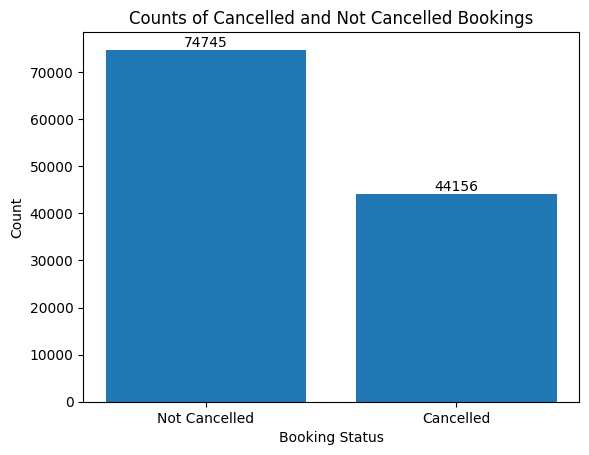

In [59]:
import matplotlib.pyplot as plt

# Get the counts of cancelled and not cancelled bookings
counts = df["is_canceled"].value_counts()

# Create a bar plot with the figure and axis objects
fig, ax = plt.subplots()

# Create the bar plot
bars = ax.bar(["Not Cancelled", "Cancelled"], counts)

# Add labels to the bars
ax.bar_label(bars)

# Add a title and labels for clarity
plt.title("Counts of Cancelled and Not Cancelled Bookings")
plt.xlabel("Booking Status")
plt.ylabel("Count")

# Show the plot
plt.show()



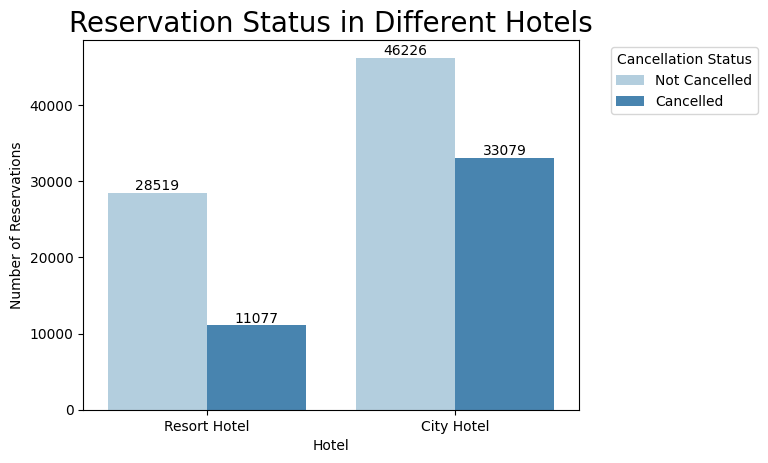

In [74]:

# Create the count plot
ax = sns.countplot(x="hotel", hue="is_canceled", data=df, palette="Blues")

# Set custom legend labels and position the legend outside the plot area
ax.legend(title="Cancellation Status", labels=["Not Cancelled", "Cancelled"], bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and title for clarity
plt.xlabel("Hotel")
plt.ylabel("Number of Reservations")
plt.title("Reservation Status in Different Hotels", size=20)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()



In [91]:
resort_hotel=df[df["hotel"]=="Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [92]:
city_hotel=df[df["hotel"]=="City Hotel"]
city_hotel["is_canceled"].value_counts(normalize=True)

is_canceled
0    0.582889
1    0.417111
Name: proportion, dtype: float64

In [94]:
resort_hotel=resort_hotel.groupby("reservation_status_date")[["adr"]].mean()

In [93]:
city_hotel=city_hotel.groupby("reservation_status_date")[["adr"]].mean()

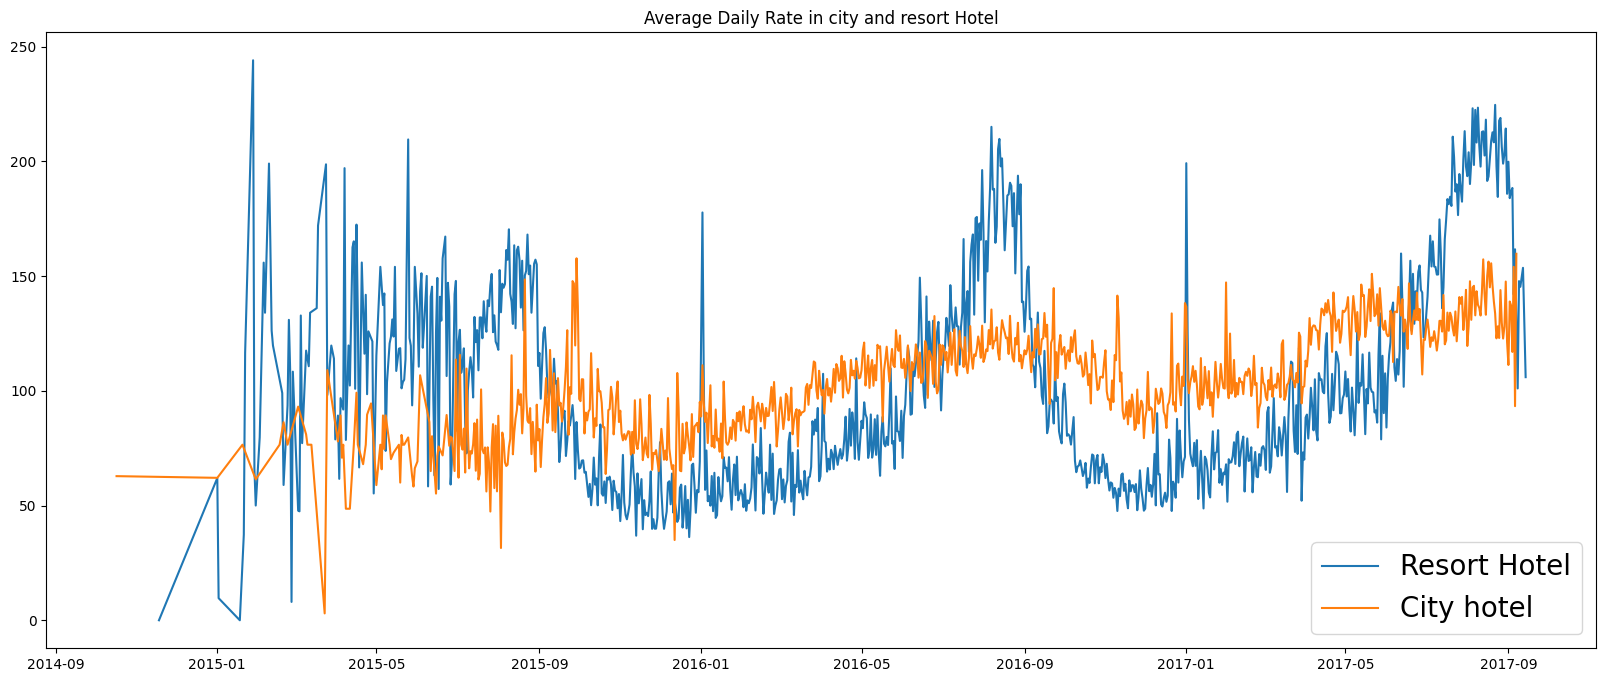

In [114]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate in city and resort Hotel")
plt.plot(resort_hotel.index, resort_hotel["adr"] , label="Resort Hotel")
plt.plot(city_hotel.index , city_hotel["adr"] , label="City hotel")
plt.legend(fontsize=20)
plt.show()

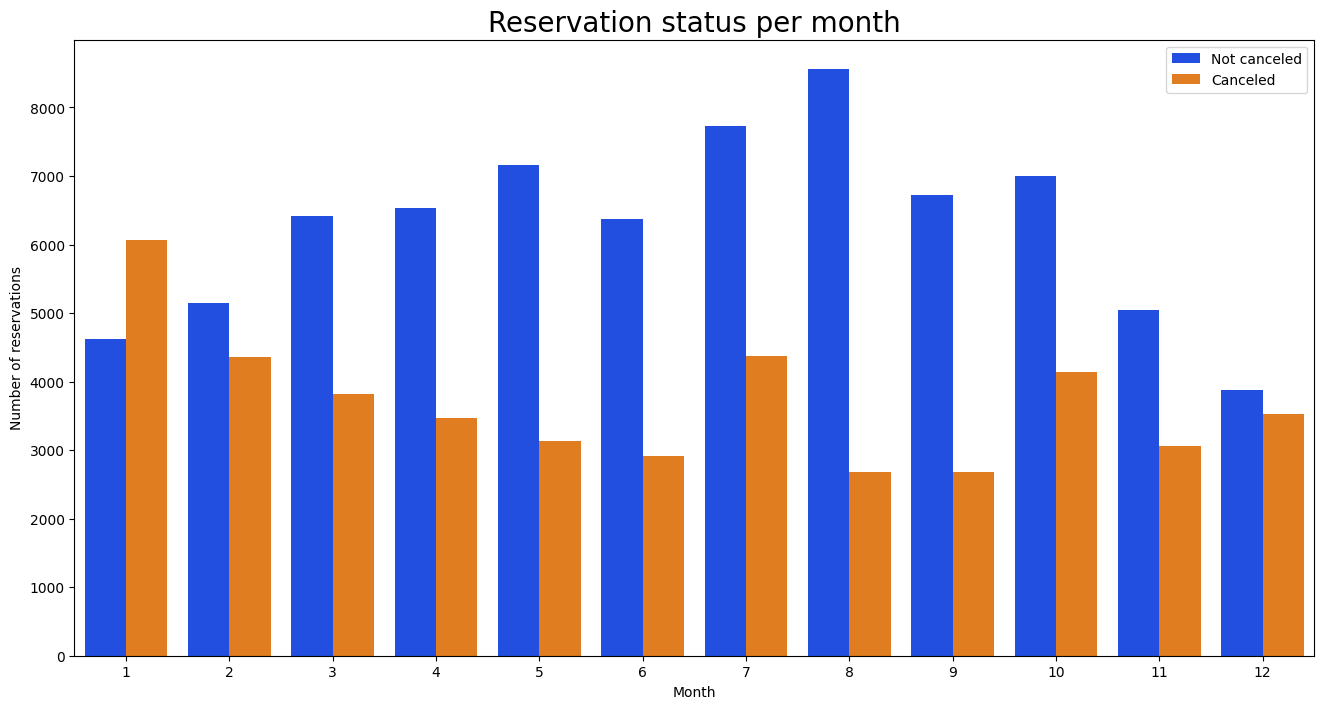

In [129]:



# Assuming df['reservation_status_date'] needs conversion and is in day/month/year format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')

# Extract month
df['month'] = df['reservation_status_date'].dt.month

plt.figure(figsize=(16, 8))
ax1 = sns.countplot(x='month', hue='is_canceled', data=df, palette='bright')
legend_labels, _ = ax1.get_legend_handles_labels()

ax1.legend(bbox_to_anchor=(1, 1))
plt.title('Reservation status per month', size=20)
plt.xlabel('Month')
plt.ylabel('Number of reservations')
plt.legend(['Not canceled', 'Canceled'])
plt.show()



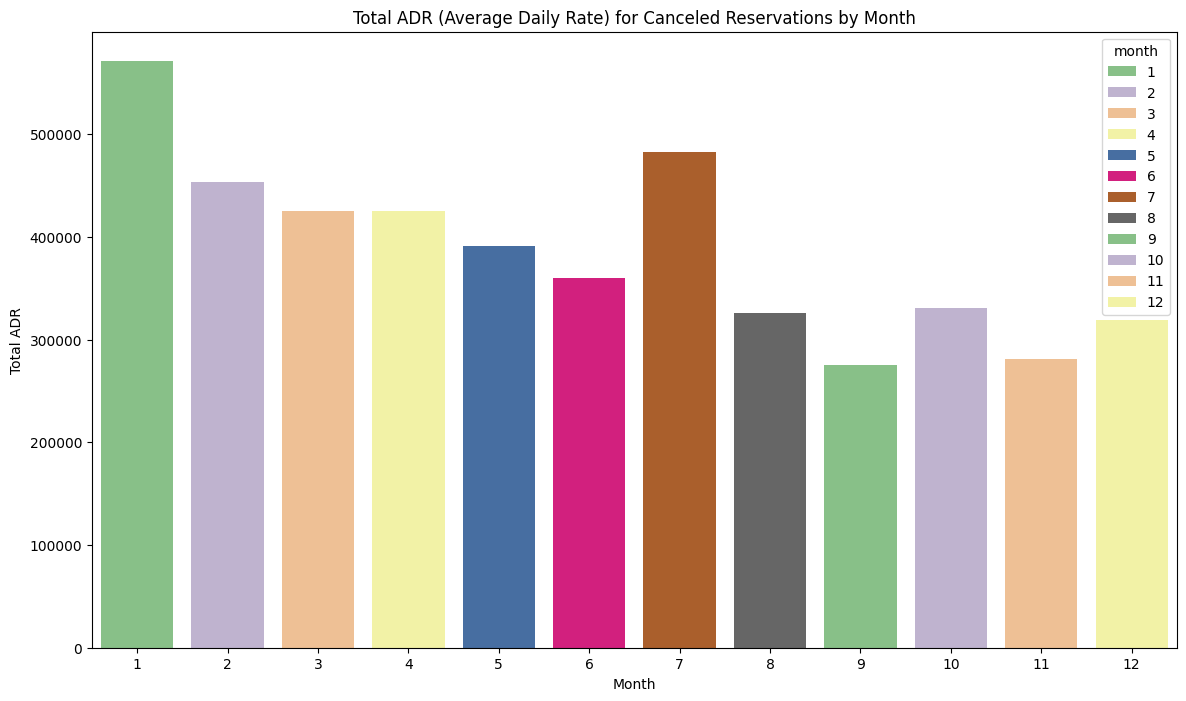

In [136]:
# Assuming df['is_canceled'] is a column indicating cancellation status (1 for canceled, 0 for not canceled)
canceled_reservations = df[df['is_canceled'] == 1]

# Group by month and sum the 'adr' (average daily rate) for canceled reservations
monthly_adr_sum = canceled_reservations.groupby('month')[['adr']].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='month', y='adr', data=monthly_adr_sum , palette="Accent" , hue="month")
plt.title('Total ADR (Average Daily Rate) for Canceled Reservations by Month')
plt.xlabel('Month')
plt.ylabel('Total ADR')
plt.show()

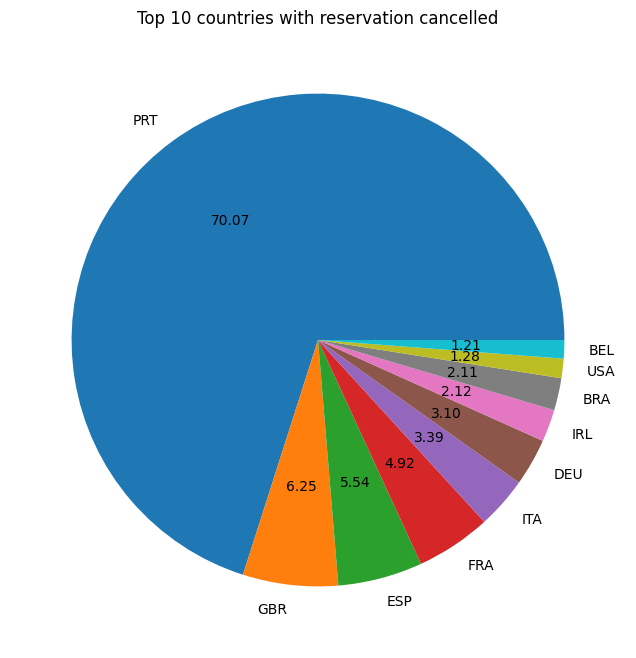

In [140]:
canceled_reservations = df[df['is_canceled'] == 1]
top_10_countries = canceled_reservations['country'].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.title("Top 10 countries with reservation cancelled")
plt.pie(top_10_countries , autopct="%.2f" , labels=top_10_countries.index)
plt.show()

In [141]:
df["market_segment"].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [142]:
df["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

In [143]:
canceled_reservations["market_segment"].value_counts(normalize=True) 

market_segment
Online TA        0.468954
Groups           0.273539
Offline TA/TO    0.187930
Direct           0.043732
Corporate        0.022431
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: proportion, dtype: float64

In [153]:
not_canceled_reservations = df[df['is_canceled'] == 0]


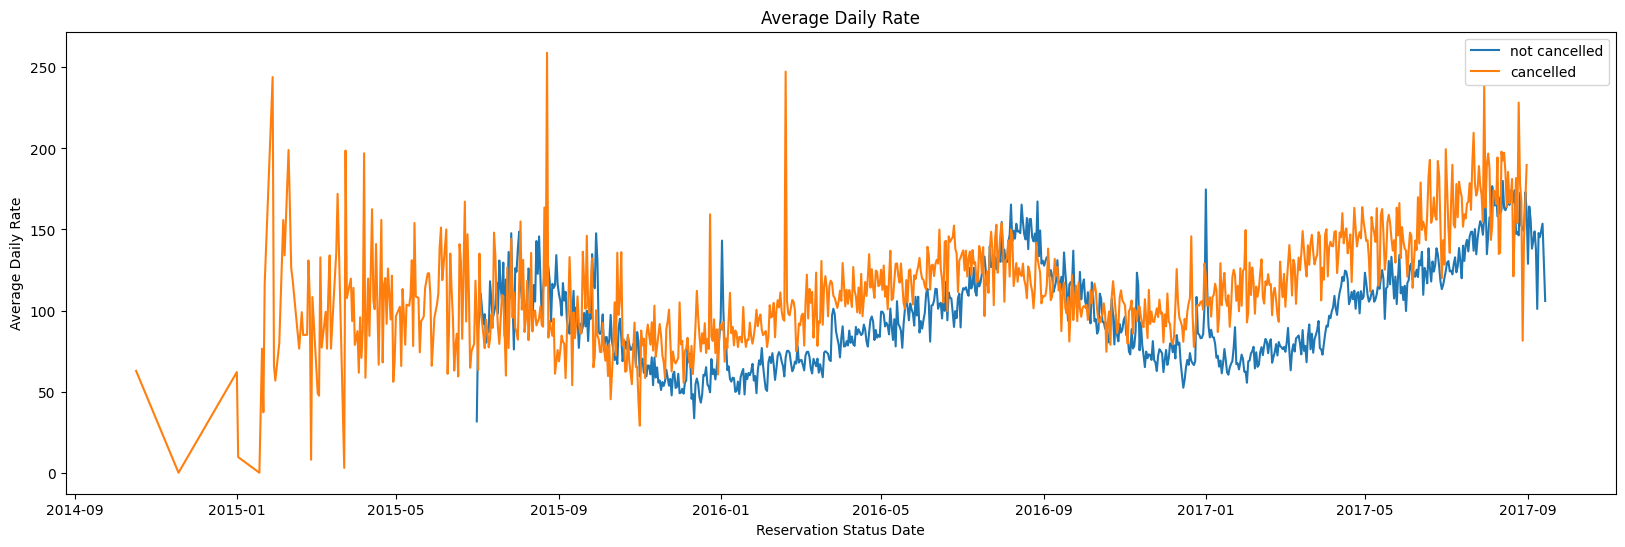

In [154]:


# Group by 'reservation_status_date' and calculate the mean 'adr' for canceled reservations
cancelled_df_adr = canceled_reservations.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values(by='reservation_status_date', inplace=True)

# Group by 'reservation_status_date' and calculate the mean 'adr' for not canceled reservations
not_cancelled_df_adr = not_canceled_reservations.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values(by='reservation_status_date', inplace=True)

# Plotting the ADR over time for canceled and not canceled reservations
plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='cancelled')
plt.legend()
plt.xlabel('Reservation Status Date')
plt.ylabel('Average Daily Rate')
plt.show()
